<a href="https://colab.research.google.com/github/shanikagalaudage/includeher_paper/blob/main/PlotsTables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started
Let's import some packages first for plotting.

In [1]:
# Imports
import numpy as np
import json

from matplotlib import rcParams
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
# Set plot formatting
rcParams["legend.framealpha"]=0.5
rcParams["legend.frameon"]=True
rcParams["legend.edgecolor"]="white"
rcParams["axes.labelsize"]=14
rcParams["axes.grid"] = True
rcParams["grid.color"] = "black"
rcParams["grid.linewidth"] = 1.0
rcParams["grid.linestyle"] = "--"
rcParams["grid.alpha"] = 0.2

rcParams["xtick.labelsize"]=20
rcParams["ytick.labelsize"]=20
rcParams["legend.fontsize"]=22
rcParams["axes.labelsize"]=22
rcParams["axes.titlesize"]=22

colours = ["#3E284F", "#AB7AD1", "#024963", "#3D9CB3","#C7639D", "#FAA7CB", "#FFEDF7", "#663351"]

In [3]:
# Set label lists and dictuonary keys maps
labels = ["Environment", "Physics", "Chemistry", "Biology"]
state_labels = ["ACT", "NSW", "QLD", "SA and NT", "TAS", "VIC", "WA"]

SUBJECTS = {
    "Physics" : "physics",
    "Chemistry" : "chemistry",
    "Biology" : "biology",
    "Environment" : "environment",
}

STATES = {
    "NSW" : "NSW",
    "VIC" : "VIC",
    "ACT" : "ACT",
    "SA and NT" : "SAandNT",
    "QLD" : "QLD",
    "TAS" : "TAS",
    "WA" : "WA",
}

# Read in data sets
dataset = {}
for state in state_labels:
    ff = open("{}_SummaryStats.json".format(STATES[state]))
    dataset[STATES[state]] = json.load(ff)

# Paper plots

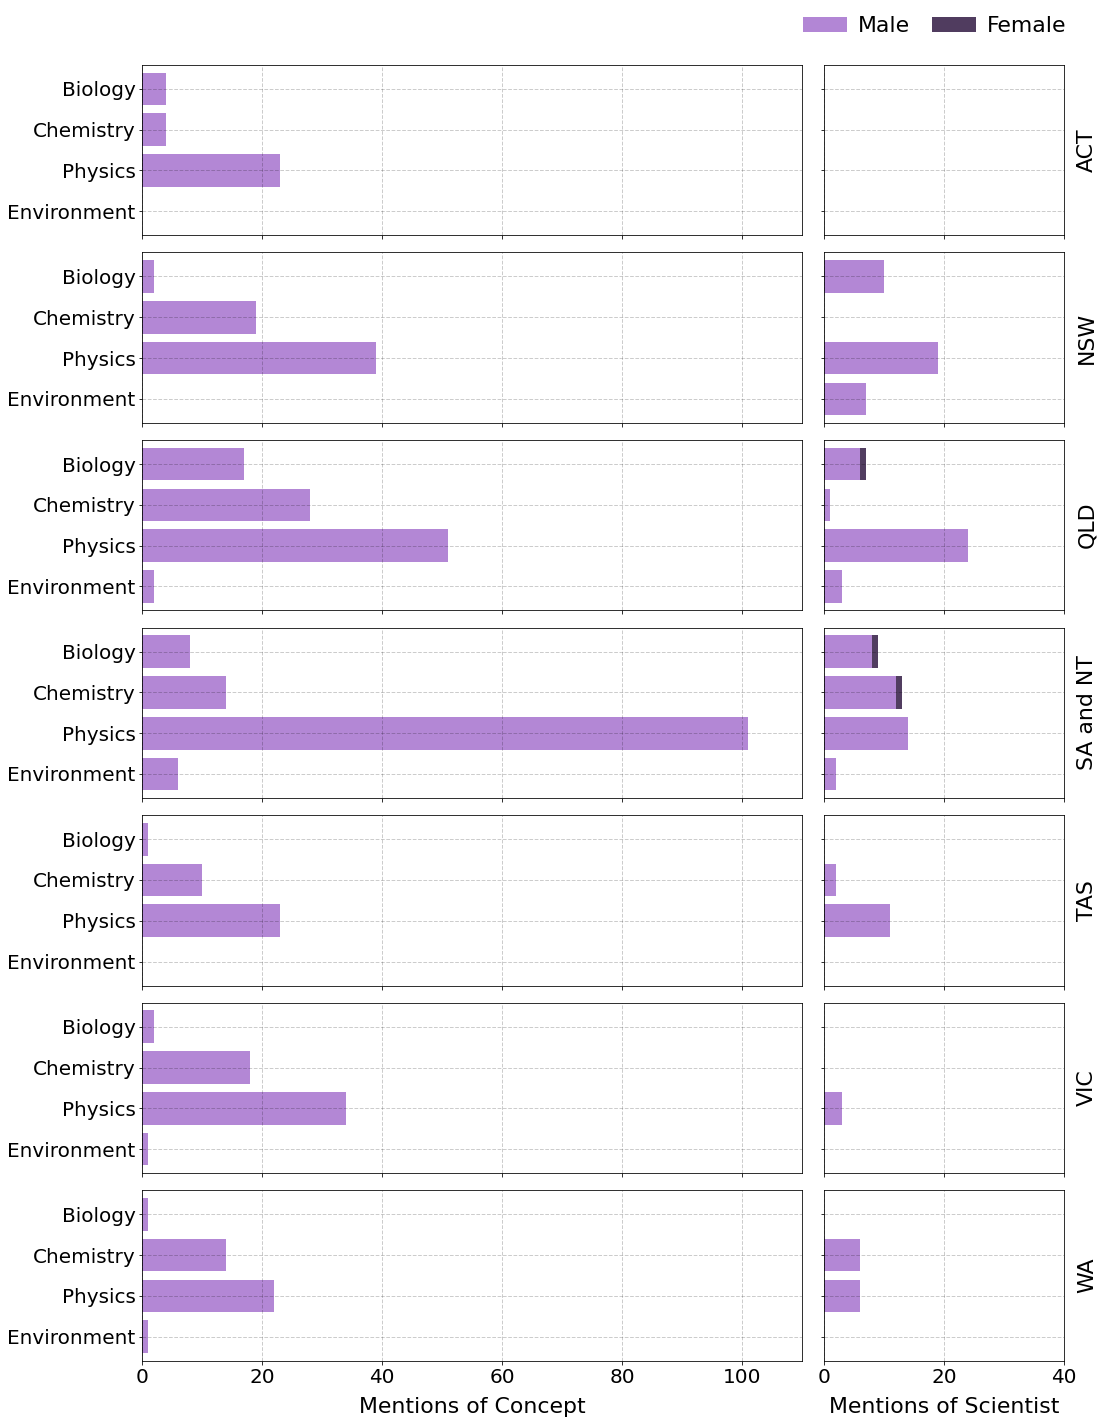

In [4]:
# Create horizontal bar chart for breakdown across subjects (figure 1)

ratio = 4./11.
xmax = 110

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(16, 20), gridspec_kw={'width_ratios': [1, 1*ratio]})

ii = 0
for sl in state_labels:
    male = [] 
    female = []
    for ll in labels:
        male.append(dataset[STATES[sl]]["subjects"][SUBJECTS[ll]]["concept"]["male"])
        female.append(dataset[STATES[sl]]["subjects"][SUBJECTS[ll]]["concept"]["female"])
    axs[ii, 0].barh(labels, male, color=colours[1], alpha=0.9)
    axs[ii, 0].barh(labels, female, left=male, color=colours[0], alpha=0.9)
    axs[ii, 0].set_ylabel(sl,labelpad=-1090)
    axs[ii, 0].set_xlim(0,xmax)
    if ii != 6:
        axs[ii, 0].axes.xaxis.set_ticklabels([])
    ii += 1
    
ii = 0
for sl in state_labels:
    male = [] 
    female = []
    for ll in labels:
        male.append(dataset[STATES[sl]]["subjects"][SUBJECTS[ll]]["scientist"]["male"])
        female.append(dataset[STATES[sl]]["subjects"][SUBJECTS[ll]]["scientist"]["female"])
    axs[ii, 1].barh(labels, male, color=colours[1], alpha=0.9)
    axs[ii, 1].barh(labels, female, left=male, color=colours[0], alpha=0.9)
    axs[ii, 1].set_xlim(0,xmax*ratio)
    axs[ii, 1].axes.yaxis.set_ticklabels([])
    axs[ii, 1].axes.yaxis.set_ticklabels([])

    if ii != 6:
        axs[ii, 1].axes.xaxis.set_ticklabels([])
    ii += 1

axs[6, 0].set_xlabel("Mentions of Concept",labelpad=10)
axs[6, 1].set_xlabel("Mentions of Scientist",labelpad=10)
plt.figlegend(['Male', 'Female'], bbox_to_anchor=(0.96, 0.99),
          bbox_transform=fig.transFigure, ncol=2, borderaxespad=0., handletextpad=0.5, columnspacing=1)
plt.subplots_adjust(wspace=0.05, hspace=0.1, left=0.15, right=0.95, top=0.95, bottom=0.05)
plt.show()

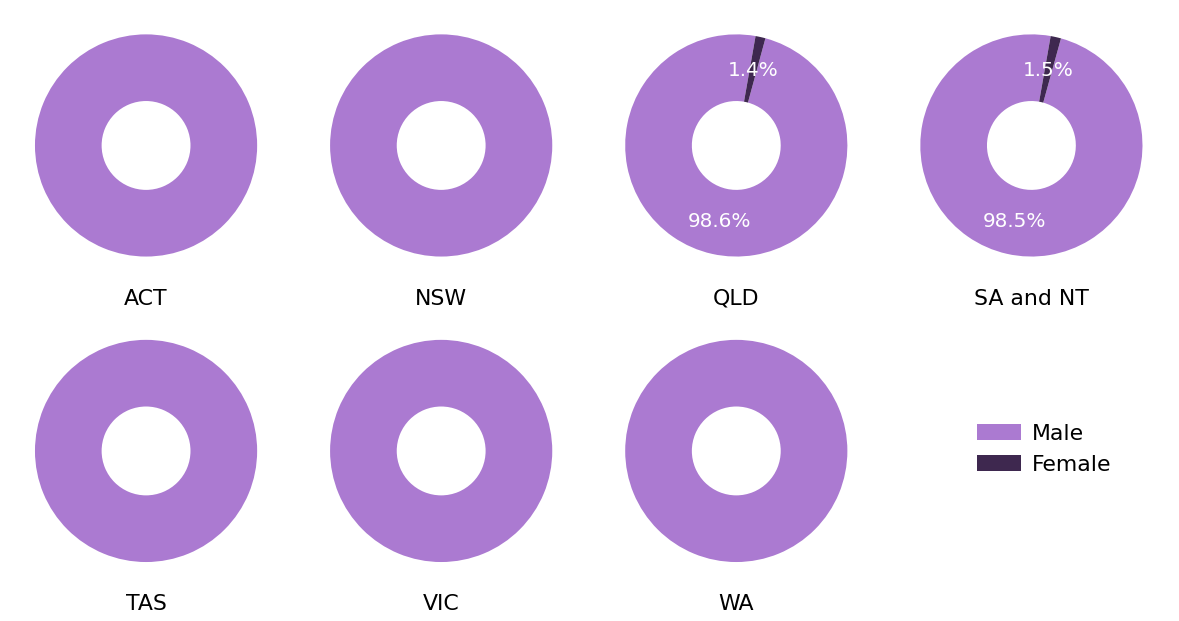

In [5]:
# Create pie charts showing male vs female breakdown per state (figure 2)
  
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 9))
values = [10,5]

jj = 0
for ii in range(4):
    m = dataset[STATES[state_labels[jj]]]["overall"]["unique"]["male"]
    f = dataset[STATES[state_labels[jj]]]["overall"]["unique"]["female"]
    val = [m,f]
    if f == 0:
        ax[0,ii].pie(
            val, colors=[colours[1],colours[0]],
            startangle=80,wedgeprops=dict(width=.6),
        )
    else:
        ax[0,ii].pie(
            val, colors=[colours[1],colours[0]],
            startangle=80,wedgeprops=dict(width=.6),
            autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize': 20, 'color':'white'}
        )
    ax[0, ii].set_xlabel(state_labels[jj])
    jj += 1

for ii in range(3):
    m = dataset[STATES[state_labels[jj]]]["overall"]["unique"]["male"]
    f = dataset[STATES[state_labels[jj]]]["overall"]["unique"]["female"]
    val = [m,f]
    if f == 0:
        ax[1,ii].pie(
            val, colors=[colours[1],colours[0]],
            startangle=80,wedgeprops=dict(width=.6),
        )
    else:
        ax[1,ii].pie(
            val, colors=[colours[1],colours[0]],
            startangle=80,wedgeprops=dict(width=.6),
            autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize': 20, 'color':'white'}
        )
    ax[1, ii].set_xlabel(state_labels[jj])
    jj += 1
    
ax[-1, -1].axis('off')
plt.figlegend(['Male', 'Female'], bbox_to_anchor=(0.91, 0.32),
          bbox_transform=fig.transFigure, ncol=1, borderaxespad=0., handletextpad=0.5, columnspacing=1)
plt.subplots_adjust(wspace=0.05, hspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

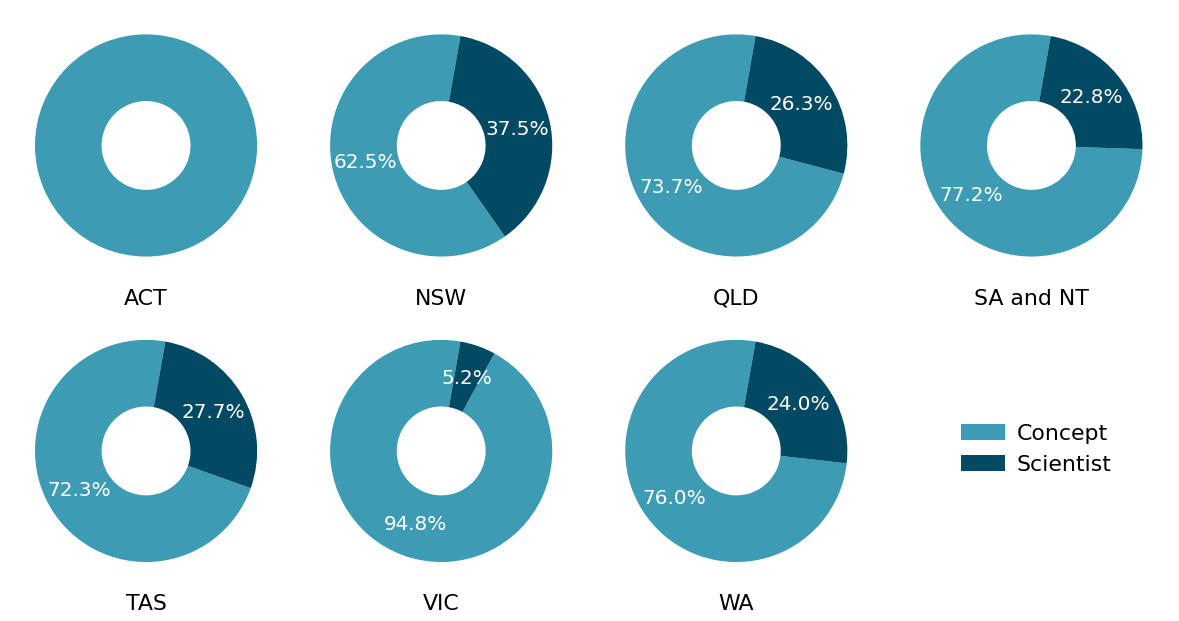

In [6]:
# Create pie charts showing scientist vs concept breakdown per state (figure 3)
  
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 9))
values = [10,5]

jj = 0
for ii in range(4):
    m1 = dataset[STATES[state_labels[jj]]]["overall"]["concept"]["male"]
    f1 = dataset[STATES[state_labels[jj]]]["overall"]["concept"]["female"]
    m2 = dataset[STATES[state_labels[jj]]]["overall"]["scientist"]["male"]
    f2 = dataset[STATES[state_labels[jj]]]["overall"]["scientist"]["female"]   
    val = [m1+f1,m2+f2]
    if m2+f2 == 0:
        ax[0,ii].pie(
            val, colors=[colours[3],colours[2]],
            startangle=80,wedgeprops=dict(width=.6),
        )
    else:
        ax[0,ii].pie(
            val, colors=[colours[3],colours[2]],
            startangle=80,wedgeprops=dict(width=.6),
            autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize': 20, 'color':'white'}
        )
    ax[0, ii].set_xlabel(state_labels[jj])
    jj += 1

for ii in range(3):
    m1 = dataset[STATES[state_labels[jj]]]["overall"]["concept"]["male"]
    f1 = dataset[STATES[state_labels[jj]]]["overall"]["concept"]["female"]
    m2 = dataset[STATES[state_labels[jj]]]["overall"]["scientist"]["male"]
    f2 = dataset[STATES[state_labels[jj]]]["overall"]["scientist"]["female"]   
    val = [m1+f1,m2+f2]
    if m2+f2 == 0:
        ax[1,ii].pie(
            val, colors=[colours[3],colours[2]],
            startangle=80,wedgeprops=dict(width=.6),
        )
    else:
        ax[1,ii].pie(
            val, colors=[colours[3],colours[2]],
            startangle=80,wedgeprops=dict(width=.6),
            autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize': 20, 'color':'white'}
        )
    ax[1, ii].set_xlabel(state_labels[jj])
    jj += 1
    
ax[-1, -1].axis('off')
plt.figlegend(['Concept', 'Scientist'], bbox_to_anchor=(0.91, 0.32),
          bbox_transform=fig.transFigure, ncol=1, borderaxespad=0., handletextpad=0.5, columnspacing=1)
plt.subplots_adjust(wspace=0.05, hspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

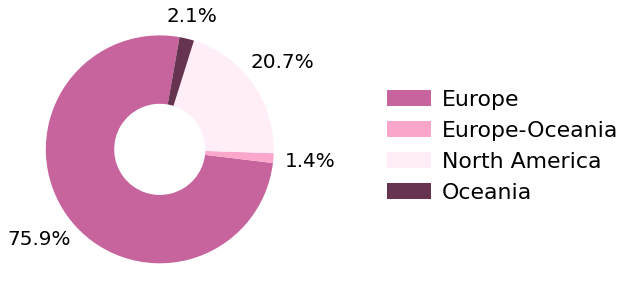

In [7]:
# Create pie chart of region breakdown for scientists across all states (figure 4)

region_list = []
for state in state_labels:
    region_list += dataset[STATES[state]]["overall"]["unique"]["region"].keys()
regions = sorted(list(set(region_list)))    

name_list = []
region = []
for state in state_labels:
    names = list(dataset[STATES[state]]["names"].keys())
    for name in names:
        region.append(dataset[STATES[state]]["names"][name]["region"])
    name_list += names

idx = [name_list.index(x) for x in set(name_list)]
unique_names = [name_list[ii] for ii in idx]
region_names = [region[ii] for ii in idx]

vals = []
for rr in regions:
    vals.append(region_names.count(rr))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
w,l,p = ax[0].pie(vals, colors=colours[4:8],
        autopct='%1.1f%%', startangle=80, wedgeprops=dict(width=.6), textprops={'fontsize': 20, 'color':'black'})
ax[1].pie(vals, colors=['white','white','white','white'])
pctdists = [2.2,2.2,2.2,2.0]

for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

plt.figlegend(regions, bbox_to_anchor=(0.98, 0.69),bbox_transform=fig.transFigure, ncol=1, borderaxespad=0., handletextpad=0.5, columnspacing=1)
plt.tight_layout()
plt.show()

# Additional plots

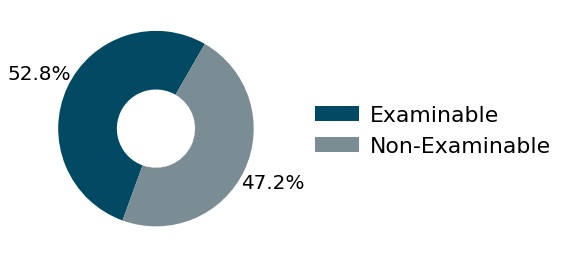

In [8]:
# Create pie chart of scientist mentions that are examinable vs non-examinable in NSW curriculum

NSWdata = dataset["NSW"]["overall"]

concept_tot = np.sum(NSWdata["concept"]["male"], NSWdata["concept"]["female"])
concept_examinable = NSWdata["concept"]["examinable"]
scientist_tot = np.sum(NSWdata["scientist"]["male"], NSWdata["scientist"]["female"])
scientist_examinable = NSWdata["scientist"]["examinable"]

vals = [scientist_examinable/scientist_tot, (scientist_tot-scientist_examinable)/scientist_tot]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
w,l,p = ax[0].pie(vals, colors=[colours[2], "#7b8d94"],
                  autopct='%1.1f%%', startangle=60, wedgeprops=dict(width=.6), textprops={'fontsize': 20, 'color':'black'}
                 )
ax[1].pie(vals, colors=['white','white','white','white'])
pctdists = [2.2,2.2,2.2,2.0]

for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

plt.figlegend(["Examinable","Non-Examinable"], bbox_to_anchor=(0.98, 0.59),bbox_transform=fig.transFigure, ncol=1, borderaxespad=0., handletextpad=0.5, columnspacing=1)
plt.tight_layout()
plt.show()

# Data summary files

The following create data files and tables with all summary statistics. 

In [9]:
# Create a json data file with all statistics

subjects = ["Biology","Chemistry","Physics", "Environment"]
states = ["ACT", "NSW", "QLD", "SA and NT", "TAS", "VIC", "WA"]
categories = ["concept", "scientist"]

stats_data = {}
for sb in subjects:
    stats_data[sb] = {}
    for cat in categories:
        stats_data[sb][cat] = {}
        for sl in states:
            m = dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["male"]
            f = dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["female"]
            stats_data[sb][cat][sl] = {"male": m, "female": f, 'both' : m+f}

stats_data["overall"] = {}
stats_data["overall"]["states"] = {}
stats_data["overall"]["subjects"] = {}

tot_across_states_categories_subjects = 0
tot_across_states_concept_subjects = 0
tot_across_states_scientist_subjects = 0

for sb in subjects:
    stats_data["overall"]["subjects"][sb] = {}
    tot_across_states_categories = 0
    for cat in categories:
        tot = 0
        tot_across_states = 0
        for sl in states:
            tot_across_states += stats_data[sb][cat][sl]["both"]
        stats_data["overall"]["subjects"][sb][cat] = tot_across_states
        tot_across_states_categories += tot_across_states
    stats_data["overall"]["subjects"][sb]["total"] = tot_across_states_categories
    tot_across_states_concept_subjects += stats_data["overall"]["subjects"][sb]["concept"]
    tot_across_states_scientist_subjects += stats_data["overall"]["subjects"][sb]["scientist"]
    tot_across_states_categories_subjects += tot_across_states_categories

for sb in subjects:
    stats_data["overall"]["subjects"][sb]["% of total mentions"] = round(stats_data["overall"]["subjects"][sb]["total"] / tot_across_states_categories_subjects * 100, 2)
    stats_data["overall"]["subjects"][sb]["% of total concept mentions"] = round(stats_data["overall"]["subjects"][sb]["concept"] / tot_across_states_concept_subjects * 100, 2)
    stats_data["overall"]["subjects"][sb]["% of total scientist mentions"] = round(stats_data["overall"]["subjects"][sb]["scientist"] / tot_across_states_scientist_subjects * 100, 2)

tot_across_subjects_categories_states = 0
tot_across_subjects_concept_states = 0
tot_across_subjects_scientist_states = 0
    
for sl in states:
    stats_data["overall"]["states"][sl] = {}
    tot_across_subjects_categories = 0
    for cat in categories:
        tot = 0
        tot_across_subjects = 0
        for sb in subjects:
            tot_across_subjects += stats_data[sb][cat][sl]["both"]
        stats_data["overall"]["states"][sl][cat] = tot_across_subjects
        tot_across_subjects_categories += tot_across_subjects
    stats_data["overall"]["states"][sl]["total"] = tot_across_subjects_categories
    tot_across_subjects_concept_states += stats_data["overall"]["states"][sl]["concept"]
    tot_across_subjects_scientist_states += stats_data["overall"]["states"][sl]["scientist"]
    tot_across_subjects_categories_states += tot_across_subjects_categories

for sl in states:
    stats_data["overall"]["states"][sl]["% of total mentions"] = round(stats_data["overall"]["states"][sl]["total"] / tot_across_subjects_categories_states * 100, 2)
    stats_data["overall"]["states"][sl]["% of total concept mentions"] = round(stats_data["overall"]["states"][sl]["concept"] / tot_across_subjects_concept_states * 100, 2)
    stats_data["overall"]["states"][sl]["% of total scientist mentions"] = round(stats_data["overall"]["states"][sl]["scientist"] / tot_across_subjects_scientist_states * 100, 2)


stats_data["overall"]["total mentions"] = tot_across_states_categories_subjects
stats_data["overall"]["total concept mentions"] = tot_across_states_concept_subjects
stats_data["overall"]["total scientist mentions"] = tot_across_states_scientist_subjects

with open('FullSummaryStats.json', 'w') as fp:
    json.dump(stats_data, fp, indent=4)

stats_data # summary statistics

{'Biology': {'concept': {'ACT': {'male': 4, 'female': 0, 'both': 4},
   'NSW': {'male': 2, 'female': 0, 'both': 2},
   'QLD': {'male': 17, 'female': 0, 'both': 17},
   'SA and NT': {'male': 8, 'female': 0, 'both': 8},
   'TAS': {'male': 1, 'female': 0, 'both': 1},
   'VIC': {'male': 2, 'female': 0, 'both': 2},
   'WA': {'male': 1, 'female': 0, 'both': 1}},
  'scientist': {'ACT': {'male': 0, 'female': 0, 'both': 0},
   'NSW': {'male': 10, 'female': 0, 'both': 10},
   'QLD': {'male': 6, 'female': 1, 'both': 7},
   'SA and NT': {'male': 8, 'female': 1, 'both': 9},
   'TAS': {'male': 0, 'female': 0, 'both': 0},
   'VIC': {'male': 0, 'female': 0, 'both': 0},
   'WA': {'male': 0, 'female': 0, 'both': 0}}},
 'Chemistry': {'concept': {'ACT': {'male': 4, 'female': 0, 'both': 4},
   'NSW': {'male': 19, 'female': 0, 'both': 19},
   'QLD': {'male': 28, 'female': 0, 'both': 28},
   'SA and NT': {'male': 14, 'female': 0, 'both': 14},
   'TAS': {'male': 10, 'female': 0, 'both': 10},
   'VIC': {'male'

In [10]:
# Create summary statistics table in latex formatting (table 2)
stat_file = open("StatsTable2.txt", 'w')
stat_file.write("\\begin{tabular}{lr|rr|rr|rr|rr|rr|rr|rr|rr} \n")
stat_file.write("\\toprule \n")
stat_file.write("{\\multirow{2}{*}{Course}} & {\\multirow{2}{*}{Type of Mention}} & \\multicolumn{2}{c}{ACT} &\\multicolumn{2}{c}{NSW} &\\multicolumn{2}{c}{QLD} &\\multicolumn{2}{c}{SA/NT} & \\multicolumn{2}{c}{TAS} &\\multicolumn{2}{c}{VIC} &\\multicolumn{2}{c}{WA} &\\multicolumn{2}{c}{Total} \\\\ \n")
stat_file.write("& & male & female & male & female & male & female & male & female & male & female & male & female & male & female & male & female \\\\ \n")
stat_file.write("\\bottomrule"+"\n")

for sb in subjects:
    stat_file.write("\\multirow{2}{*}{"+"{}".format(sb)+"}")
    m_tot_across_states_categories = 0
    f_tot_across_states_categories = 0
    for cat in categories:
        stat_file.write(" & {}".format(cat))
        m_tot_across_states = 0
        f_tot_across_states = 0
        for sl in state_labels:
            m = dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["male"]
            f = dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["female"]
            stat_file.write(" & "+"{}".format(m)+" & "+"{}".format(f))
            m_tot_across_states += m
            f_tot_across_states += f        
        stat_file.write(" & "+"{}".format(m_tot_across_states)+" & "+"{}".format(f_tot_across_states))
        stat_file.write("\\\\ \n")
    stat_file.write("\\hline \n")

stat_file.write("\\multirow{3}{*}{Total}")

for cat in categories:
    m_tot_across_subjects_states = 0
    f_tot_across_subjects_states = 0
    stat_file.write(" & {}".format(cat))
    for sl in state_labels:
        m_tot_across_subjects = 0
        f_tot_across_subjects = 0
        for sb in subjects:
            m_tot_across_subjects += dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["male"]
            f_tot_across_subjects += dataset[STATES[sl]]["subjects"][SUBJECTS[sb]][cat]["female"]
        stat_file.write(" & "+"{}".format(m_tot_across_subjects)+" & "+"{}".format(f_tot_across_subjects))
        m_tot_across_subjects_states += m_tot_across_subjects
        f_tot_across_subjects_states += f_tot_across_subjects
    stat_file.write(" & "+"{}".format(m_tot_across_subjects_states)+" & "+"{}".format(f_tot_across_subjects_states))
    stat_file.write("\\\\ \n")

stat_file.write(" & Unique names")
for sl in state_labels:
    m = dataset[STATES[sl]]["overall"]["unique"]["male"]
    f = dataset[STATES[sl]]["overall"]["unique"]["female"]
    stat_file.write(" & "+"{}".format(m)+" & "+"{}".format(f))

name_list = []
gender = []
for sl in state_labels:
    names = list(dataset[STATES[sl]]["names"].keys())
    for name in names:
        gender.append(dataset[STATES[sl]]["names"][name]["gender"])
    name_list += names

idx = [name_list.index(x) for x in set(name_list)]
unique_names = [name_list[ii] for ii in idx]
scientist_gender = [gender[ii] for ii in idx]
tot_unique_female = scientist_gender.count("female")
tot_unique_male = len(scientist_gender) - tot_unique_female
stat_file.write(" & "+"{}".format(tot_unique_male)+" & "+"{}".format(tot_unique_female))

stat_file.write("\\\\ \n")
stat_file.write("\\bottomrule"+"\n")
stat_file.write("\\end{tabular} \n")
stat_file.close()

print(sorted(unique_names)) # names of all scientists that appeared across all curricula analysed

['Alan Walsh', 'Albert Einstein', 'Albert Michelson', 'Alfred Wallace', 'Alfred Wegener', 'Alois Alzheimer', 'Amedeo Avogadro', 'Anders Celsius', 'Andreas Rett', 'Antoine Lavoisier', 'Aristotle', 'Arthur Compton', 'Arthur Holmes', 'August Wilhelm von Hofmann', 'Augustin-Jean Fresnel', 'Bernhard Tollens', 'Camillo Golgi', 'Carl Bosch', 'Carl Linnaeus', 'Carolus Linnaeus', 'Charles Darwin', 'Charles Keeling', 'Charles-Augustin de Coulomb', 'Christiaan Huygens', 'Christian Doppler', 'Claudias Ptolemy', 'Clinton Davisson', 'Daniel Bernoulli', 'Daniel Fahrenheit', 'Democritus', 'Dmitri Mendeleev', 'Drummond Matthews', 'Edward Morley', 'Edward Simpson', 'Edwin Hubble', 'Ejnar Hertzsprung', 'Enrico Fermi', 'Ernest Marsden', 'Ernest Rutherford', 'Erwin Schrodinger', 'Etienne-Louis Malus', 'Francis Crick', 'Frank Drake', 'Frederick Lincoln', 'Frederick Vine', 'Friedrich Henle', 'Friedrich Hund', 'Friedrich Kekule', 'Friedrich Mohs', 'Friedrich Paschen', 'Friedrich Wohler', 'Fritz Haber', 'Fritz

In [11]:
ff = open('StatsTable2.txt', 'r')
file_contents = ff.read()
print(file_contents)
ff.close()

\begin{tabular}{lr|rr|rr|rr|rr|rr|rr|rr|rr} 
\toprule 
{\multirow{2}{*}{Course}} & {\multirow{2}{*}{Type of Mention}} & \multicolumn{2}{c}{ACT} &\multicolumn{2}{c}{NSW} &\multicolumn{2}{c}{QLD} &\multicolumn{2}{c}{SA/NT} & \multicolumn{2}{c}{TAS} &\multicolumn{2}{c}{VIC} &\multicolumn{2}{c}{WA} &\multicolumn{2}{c}{Total} \\ 
& & male & female & male & female & male & female & male & female & male & female & male & female & male & female & male & female \\ 
\bottomrule
\multirow{2}{*}{Biology} & concept & 4 & 0 & 2 & 0 & 17 & 0 & 8 & 0 & 1 & 0 & 2 & 0 & 1 & 0 & 35 & 0\\ 
 & scientist & 0 & 0 & 10 & 0 & 6 & 1 & 8 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 24 & 2\\ 
\hline 
\multirow{2}{*}{Chemistry} & concept & 4 & 0 & 19 & 0 & 28 & 0 & 14 & 0 & 10 & 0 & 18 & 0 & 14 & 0 & 107 & 0\\ 
 & scientist & 0 & 0 & 0 & 0 & 1 & 0 & 12 & 1 & 2 & 0 & 0 & 0 & 6 & 0 & 21 & 1\\ 
\hline 
\multirow{2}{*}{Physics} & concept & 23 & 0 & 39 & 0 & 51 & 0 & 101 & 0 & 23 & 0 & 34 & 0 & 22 & 0 & 293 & 0\\ 
 & scientist & 0 & 